# Lab 3 

zID: z5383372

Name: Pinheng Chen

See details in specification.

### Step 1. Import necessary tools

In [1]:
import numpy as np
from tensorflow import keras # using the keras dataset through tensorflow
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

### Step 2. Load the Fashion-MNIST dataset

In [2]:
# x0, y0 are original whole dataset
(x0_train, y0_train), (x0_test, y0_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
assert x0_train.shape == (60000, 28, 28) # assert!
assert x0_test.shape == (10000, 28, 28)
assert y0_train.shape == (60000,)
assert y0_test.shape == (10000,)

### Step 3. Take a subset of the dataset
We gonna varify the number of samples when testing the performance of classification latter.

In [4]:
# take 3000 samples from original training set x0_train and y0_train
x1_train, x10_train, y1_train, y10_train = train_test_split(x0_train, y0_train, test_size = 0.95, train_size = 0.05, 
                                                       shuffle = True)
# take 1000 samples from original testing set x0_test and y0_test
x1_test, x10_test, y1_test, y10_test = train_test_split(x0_test, y0_test, test_size = 0.9, train_size = 0.1, 
                                                       shuffle = True)
# take 6000 samples from original training set x0_train and y0_train
x2_train, x20_train, y2_train, y20_train = train_test_split(x0_train, y0_train, test_size = 0.9, train_size = 0.1, 
                                                       shuffle = True)
# take 12000 samples from original training set x0_train and y0_train
x3_train, x30_train, y3_train, y30_train = train_test_split(x0_train, y0_train, test_size = 0.8, train_size = 0.2, 
                                                       shuffle = True)

In [5]:
# check the lengths
x1_train_len, y1_train_len = len(x1_train), len(y1_train)
x10_train_len, y10_train_len = len(x10_train), len(y10_train)
print("training set: ", x1_train_len, y1_train_len, x10_train_len, y10_train_len)
x1_test_len, y1_test_len = len(x1_test), len(y1_test)
x10_test_len, y10_test_len = len(x10_test), len(y10_test)
print("testing set: ", x1_test_len, y1_test_len, x10_test_len, y10_test_len)

training set:  3000 3000 57000 57000
testing set:  1000 1000 9000 9000


### Step 4. Perform necessary reshaping of the data for the classifiers

In [6]:
def image_reshape(dataset, x_require, y_require):
    n,nx,ny = dataset.shape
    data_set2d = dataset.reshape(n, (x_require*y_require))
    return data_set2d

In [7]:
# y sets are labels, so they don't need to be reshaped.
x1_train_reshaped= image_reshape(x1_train,28,28)
x10_train_reshaped= image_reshape(x10_train,28,28)
x2_train_reshaped= image_reshape(x2_train,28,28)
x20_train_reshaped= image_reshape(x20_train,28,28)
x3_train_reshaped= image_reshape(x3_train,28,28)
x30_train_reshaped= image_reshape(x30_train,28,28)

x1_test_reshaped= image_reshape(x1_test,28,28)
x10_test_reshaped= image_reshape(x10_test,28,28)


### Step 5. Initialise the classifier model
Initialising the classifier after importing them.
Including 3 classifiers: KNN, DT and SGD.

### Step 6. Fit the model to the training data

In [8]:
# KNN Classifier
# Initialising KNN
neigh = KNeighborsClassifier(n_neighbors = 3, p = 2) # using euclidean distance
neigh2 = KNeighborsClassifier(n_neighbors = 3, p = 2)
neigh3 = KNeighborsClassifier(n_neighbors = 3, p = 2)
# Fitting
neigh.fit(x1_train_reshaped, y1_train)
neigh2.fit(x2_train_reshaped, y2_train)
neigh3.fit(x3_train_reshaped, y3_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# DT Classifier
# Initialising DT
clf_DT = DecisionTreeClassifier()
clf_DT2 = DecisionTreeClassifier()
clf_DT3 = DecisionTreeClassifier()
# Fitting
clf_DT.fit(x1_train_reshaped, y1_train)
clf_DT2.fit(x2_train_reshaped, y2_train)
clf_DT3.fit(x3_train_reshaped, y3_train)

DecisionTreeClassifier()

In [10]:
# SGD Classifier
# Initialising SGD
clf_SGD = SGDClassifier(max_iter = 250)
clf_SGD2 = SGDClassifier(max_iter = 250)
clf_SGD3 = SGDClassifier(max_iter = 250)
# Fitting
clf_SGD.fit(x1_train_reshaped, y1_train)
clf_SGD2.fit(x2_train_reshaped, y2_train)
clf_SGD3.fit(x3_train_reshaped, y3_train)

SGDClassifier(max_iter=250)

### Step 7. Use the trained/fitted model to evalueate the testing data

In [11]:
y1_KNNresult = neigh.predict(x1_test_reshaped)
y2_KNNresult = neigh2.predict(x1_test_reshaped)
y3_KNNresult = neigh3.predict(x1_test_reshaped)

y1_DTresult = clf_DT.predict(x1_test_reshaped)
y2_DTresult = clf_DT2.predict(x1_test_reshaped)
y3_DTresult = clf_DT3.predict(x1_test_reshaped)

y1_SGDresult = clf_SGD.predict(x1_test_reshaped)
y2_SGDresult = clf_SGD2.predict(x1_test_reshaped)
y3_SGDresult = clf_SGD3.predict(x1_test_reshaped)

### Step 8. Report the performance of each classifier

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        92
           1       0.95      0.95      0.95       108
           2       0.59      0.67      0.63        92
           3       0.80      0.79      0.80        87
           4       0.74      0.62      0.68       114
           5       0.97      0.69      0.81       104
           6       0.55      0.52      0.53       110
           7       0.78      0.90      0.83        98
           8       0.97      0.91      0.94        93
           9       0.80      0.92      0.85       102

    accuracy                           0.78      1000
   macro avg       0.79      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000



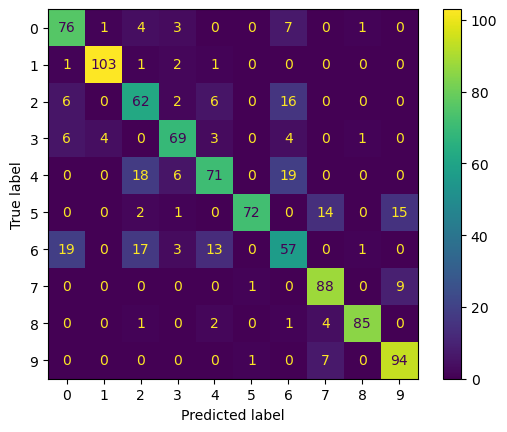

In [12]:
# KNN report and confusion matrix
KNN_report = classification_report(y1_test, y1_KNNresult)
print(KNN_report)
KNN_confusion_matrix = confusion_matrix(y1_test, y1_KNNresult)
showKNN_CM = ConfusionMatrixDisplay(confusion_matrix = KNN_confusion_matrix)
showKNN_CM.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        92
           1       0.96      0.94      0.95       108
           2       0.61      0.74      0.67        92
           3       0.83      0.83      0.83        87
           4       0.79      0.65      0.71       114
           5       0.97      0.66      0.79       104
           6       0.57      0.49      0.53       110
           7       0.81      0.96      0.88        98
           8       0.96      0.96      0.96        93
           9       0.84      0.96      0.89       102

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



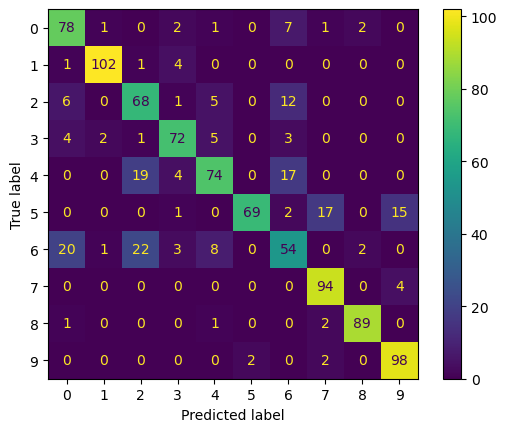

In [13]:
# set the number of training samples as 6000
KNN_report2 = classification_report(y1_test, y2_KNNresult)
print(KNN_report2)
KNN_confusion_matrix2 = confusion_matrix(y1_test, y2_KNNresult)
showKNN_CM2 = ConfusionMatrixDisplay(confusion_matrix = KNN_confusion_matrix2)
showKNN_CM2.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        92
           1       0.97      0.96      0.97       108
           2       0.66      0.85      0.74        92
           3       0.86      0.83      0.84        87
           4       0.81      0.63      0.71       114
           5       0.99      0.73      0.84       104
           6       0.63      0.57      0.60       110
           7       0.84      0.95      0.89        98
           8       0.96      0.95      0.95        93
           9       0.86      0.98      0.92       102

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.83      0.82      0.82      1000



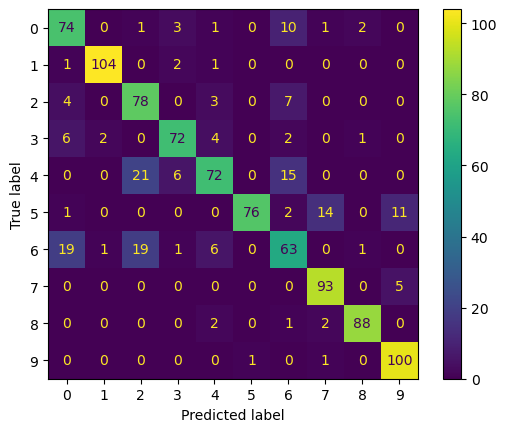

In [14]:
# set the number of training samples as 12000
KNN_report3 = classification_report(y1_test, y3_KNNresult)
print(KNN_report3)
KNN_confusion_matrix3 = confusion_matrix(y1_test, y3_KNNresult)
showKNN_CM3 = ConfusionMatrixDisplay(confusion_matrix = KNN_confusion_matrix3)
showKNN_CM3.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        92
           1       0.95      0.91      0.93       108
           2       0.57      0.60      0.59        92
           3       0.70      0.79      0.75        87
           4       0.61      0.56      0.58       114
           5       0.81      0.84      0.82       104
           6       0.48      0.45      0.47       110
           7       0.77      0.78      0.77        98
           8       0.83      0.82      0.82        93
           9       0.81      0.81      0.81       102

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



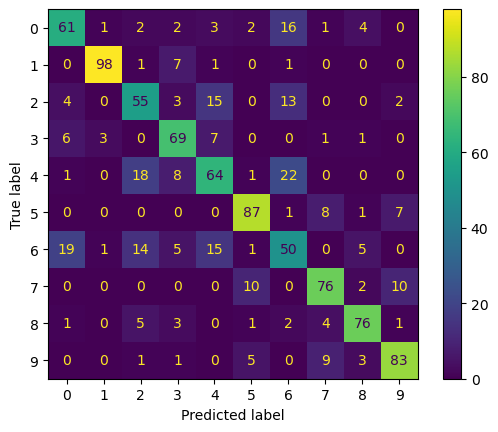

In [15]:
# DT report and confusion matrix
DT_report = classification_report(y1_test, y1_DTresult)
print(DT_report)
DT_confusion_matrix = confusion_matrix(y1_test, y1_DTresult)
showDT_CM = ConfusionMatrixDisplay(confusion_matrix = DT_confusion_matrix)
showDT_CM.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        92
           1       0.96      0.91      0.93       108
           2       0.50      0.62      0.55        92
           3       0.68      0.77      0.72        87
           4       0.65      0.56      0.60       114
           5       0.82      0.81      0.81       104
           6       0.45      0.44      0.44       110
           7       0.76      0.88      0.82        98
           8       0.85      0.86      0.86        93
           9       0.88      0.82      0.85       102

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.72      0.73      1000



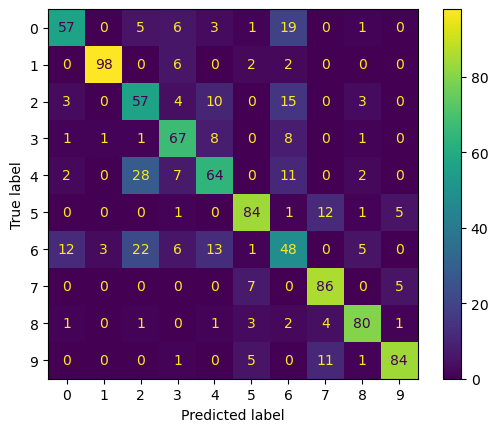

In [16]:
# set the number of training samples as 6000
DT_report2 = classification_report(y1_test, y2_DTresult)
print(DT_report2)
DT_confusion_matrix2 = confusion_matrix(y1_test, y2_DTresult)
showDT_CM2 = ConfusionMatrixDisplay(confusion_matrix = DT_confusion_matrix2)
showDT_CM2.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        92
           1       0.93      0.92      0.92       108
           2       0.58      0.64      0.61        92
           3       0.77      0.78      0.78        87
           4       0.65      0.63      0.64       114
           5       0.81      0.88      0.84       104
           6       0.56      0.48      0.52       110
           7       0.82      0.82      0.82        98
           8       0.85      0.87      0.86        93
           9       0.88      0.86      0.87       102

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



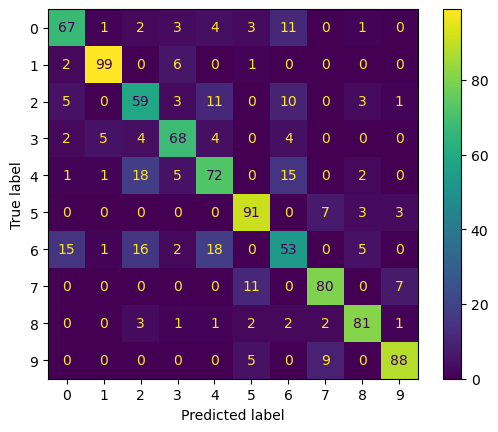

In [17]:
# set the number of training samples as 12000
DT_report3 = classification_report(y1_test, y3_DTresult)
print(DT_report3)
DT_confusion_matrix3 = confusion_matrix(y1_test, y3_DTresult)
showDT_CM3 = ConfusionMatrixDisplay(confusion_matrix = DT_confusion_matrix3)
showDT_CM3.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.47      0.58        92
           1       0.95      0.95      0.95       108
           2       0.85      0.49      0.62        92
           3       0.76      0.75      0.76        87
           4       0.72      0.41      0.53       114
           5       0.96      0.77      0.86       104
           6       0.36      0.77      0.49       110
           7       0.85      0.97      0.90        98
           8       0.88      0.91      0.89        93
           9       0.88      0.91      0.89       102

    accuracy                           0.74      1000
   macro avg       0.80      0.74      0.75      1000
weighted avg       0.79      0.74      0.75      1000



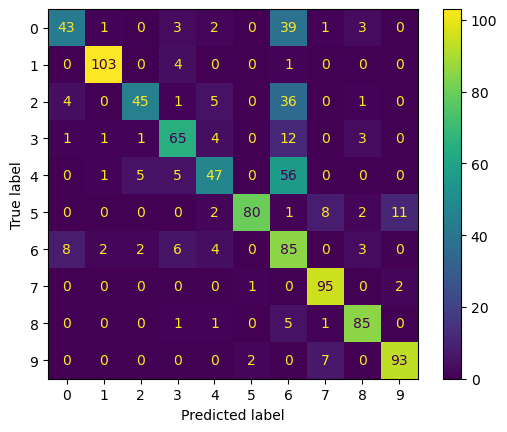

In [18]:
# SGD report and confusion matrix
SGD_report = classification_report(y1_test, y1_SGDresult)
print(SGD_report)
SGD_confusion_matrix = confusion_matrix(y1_test, y1_SGDresult)
showSGD_CM = ConfusionMatrixDisplay(confusion_matrix = SGD_confusion_matrix)
showSGD_CM.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.60      0.71        92
           1       0.74      0.99      0.85       108
           2       0.69      0.67      0.68        92
           3       0.82      0.77      0.79        87
           4       0.86      0.48      0.62       114
           5       0.87      0.85      0.86       104
           6       0.46      0.65      0.54       110
           7       0.86      0.92      0.89        98
           8       0.86      0.91      0.89        93
           9       0.92      0.87      0.89       102

    accuracy                           0.77      1000
   macro avg       0.79      0.77      0.77      1000
weighted avg       0.79      0.77      0.77      1000



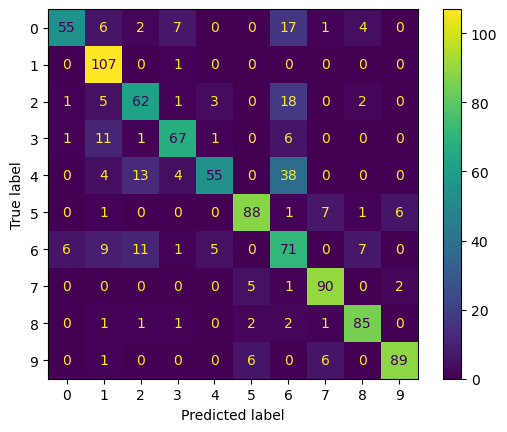

In [19]:
# set the number of training samples as 6000
SGD_report2 = classification_report(y1_test, y2_SGDresult)
print(SGD_report2)
SGD_confusion_matrix2 = confusion_matrix(y1_test, y2_SGDresult)
showSGD_CM2 = ConfusionMatrixDisplay(confusion_matrix = SGD_confusion_matrix2)
showSGD_CM2.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        92
           1       0.96      0.94      0.95       108
           2       0.82      0.50      0.62        92
           3       0.70      0.85      0.77        87
           4       0.56      0.89      0.69       114
           5       0.94      0.86      0.89       104
           6       0.68      0.44      0.53       110
           7       0.93      0.93      0.93        98
           8       0.86      0.89      0.88        93
           9       0.89      0.96      0.92       102

    accuracy                           0.80      1000
   macro avg       0.82      0.80      0.80      1000
weighted avg       0.82      0.80      0.80      1000



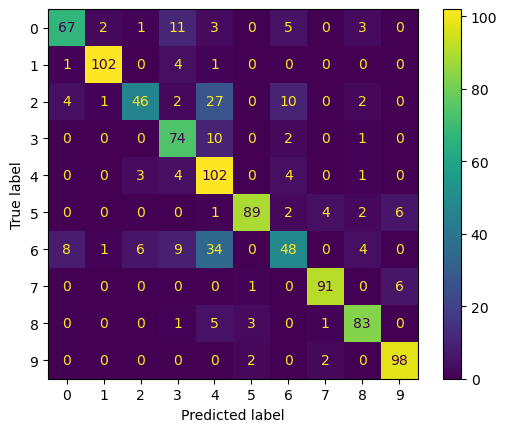

In [20]:
# set the number of training samples as 12000
SGD_report3 = classification_report(y1_test, y3_SGDresult)
print(SGD_report3)
SGD_confusion_matrix3 = confusion_matrix(y1_test, y3_SGDresult)
showSGD_CM3 = ConfusionMatrixDisplay(confusion_matrix = SGD_confusion_matrix3)
showSGD_CM3.plot()
plt.show()

## Conclusion
According to above experiments, we are able to see that when the number of training samples increasing, the classifiers will perform better, they will get higher accuracy, precision, recall and F1-score.
When comparing with the result of the Fashion-MNIST paper, my results are worse than the results listed in the paper. I suppose that was because I did not test the tremendous types of parameters to obtain the best model. 